Object detection with YOLOv3 revolutionizes the way computers identify objects in images. Unlike traditional image classification methods, object detection involves locating multiple objects within an image before classifying them. YOLOv3, short for "You Only Look Once," stands out for its efficiency and accuracy, thanks to its single-pass approach through a convolutional neural network (ConvNet). While traditional ConvNets may struggle with real-world scenarios like self-driving cars, YOLOv3 excels with its ability to swiftly analyze frames and accurately detect objects like pedestrians and bicycles.

YOLOv3 brings a host of improvements over the original YOLO, including multi-scale detection, which allows it to detect objects of various sizes more effectively. It also utilizes a Feature Pyramid Network to extract features at different levels of detail, enabling precise detection of both large and small objects. Additionally, YOLOv3 employs bounding box regression to refine predicted boxes for better object localization. Its deeper Darknet-53 backbone architecture enhances feature extraction and object detection. Furthermore, advanced training techniques like focal loss help the model focus on challenging examples during training, leading to improved classification and localization accuracy, particularly in scenarios with imbalanced class distributions or hard-to-detect objects. These improvements result in higher detection accuracy, better handling of objects at different scales, and increased robustness, making YOLOv3 a more powerful and versatile object detection system.

By downloading the pre-trained model weights and using Python helper files like yolo3.py, you can seamlessly integrate YOLOv3 into your projects for high-speed, precise object detection tasks.

To get started, you'll need to download a few files and resources for our YOLOv3 object detection demonstration in Colab.

1. **yolo3.py**: This file contains all the predefined functions required for YOLOv3 object detection. You can download it from [this link](https://github.com/jeffprosise/Deep-Learning/blob/master/yolo3.py).

2. **yolo3_modified.py**: This file modifies the `draw_boxes` function for customized drawing of bounding boxes. You can download it from [this link](https://github.com/jeffprosise/Deep-Learning/blob/master/yolo3_modified.py).

3. **Model Weights**: Download the YOLOv3 model weights from [this link](https://jeffpro.blob.core.windows.net/public/coco_yolo3.h5). These weights are required for running the object detection model.

4. **Images**: Download the following images that we'll use for object detection:
   - abby-lady.jpg
   - facebook.jpg
   - ai-image.jpg

5. **Font**: Download the FiraMono-Medium font file from [this link](https://github.com/mozilla/Fira/blob/master/otf/FiraMono-Medium.otf). This font will be used for displaying text on images during the object detection process.

Once you have downloaded these files and resources, you're ready to proceed with the YOLOv3 object detection demonstration in Colab.


In [ ]:
from yolo3 import *
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

Let us load the YOLOv3 model weights stored in the 'coco_yolo3.h5' file into the variable 'model'.


In [ ]:
model = load_model('/content/coco_yolo3.h5')

This code reads an image file ('facebook.jpg'), extracts its width and height, and then displays the image using Matplotlib with a specified figure size and no axis ticks.

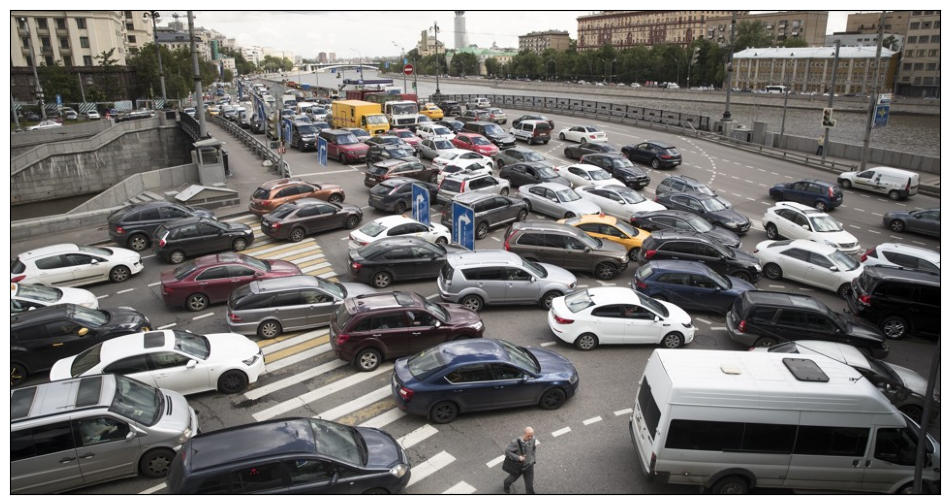

In [ ]:
image = plt.imread('/content/facebook.jpg')
width, height = image.shape[1], image.shape[0]
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

This code loads the image 'facebook.jpg', resizes it to the dimensions specified by YOLO3, converts it to a NumPy array normalized between 0 and 1, expands its dimensions to fit the expected input shape of the model, and then performs inference using the loaded YOLOv3 model to predict bounding boxes and class probabilities for objects in the image.

In [ ]:
x = load_img('/content/facebook.jpg', target_size=(YOLO3.width, YOLO3.height))
x = img_to_array(x) / 255
x = np.expand_dims(x, axis=0)
y = model.predict(x)

1/1 [==============================] - 4s 4s/step


This code decodes the predictions generated by the YOLOv3 model ('y') into bounding boxes ('boxes') relative to the original image dimensions ('width' and 'height'). Then, it iterates over each predicted box, printing its coordinates (xmin, ymin, xmax, ymax), associated label, and confidence score.





In [ ]:
boxes = decode_predictions(y, width, height)

for box in boxes:
    print(f'({box.xmin}, {box.ymin}), ({box.xmax}, {box.ymax}), {box.label}, {box.score}')

(385, 356), (598, 438), car, 0.9951571226119995
(6, 388), (179, 501), car, 0.9930679202079773
(155, 436), (414, 508), car, 0.987257719039917
(93, 200), (231, 253), car, 0.9776978492736816
(251, 202), (361, 242), car, 0.9720026254653931
(138, 219), (253, 266), car, 0.9684591889381409
(508, 230), (638, 285), car, 0.9825067520141602
(3, 245), (136, 288), car, 0.9784830212593079
(337, 241), (466, 293), car, 0.9799181818962097
(768, 254), (877, 310), car, 0.9914984107017517
(144, 259), (289, 315), car, 0.9849948287010193
(438, 263), (582, 318), car, 0.9952718615531921
(640, 278), (780, 337), car, 0.99045330286026
(866, 280), (959, 355), car, 0.9264926910400391
(214, 282), (356, 347), car, 0.9833309650421143
(549, 304), (712, 363), car, 0.9983060956001282
(745, 307), (892, 365), car, 0.9889624118804932
(324, 305), (497, 384), car, 0.9726859331130981
(44, 337), (266, 403), car, 0.987834095954895
(504, 441), (549, 508), person, 0.9819619059562683
(631, 142), (693, 170), car, 0.9739705324172974

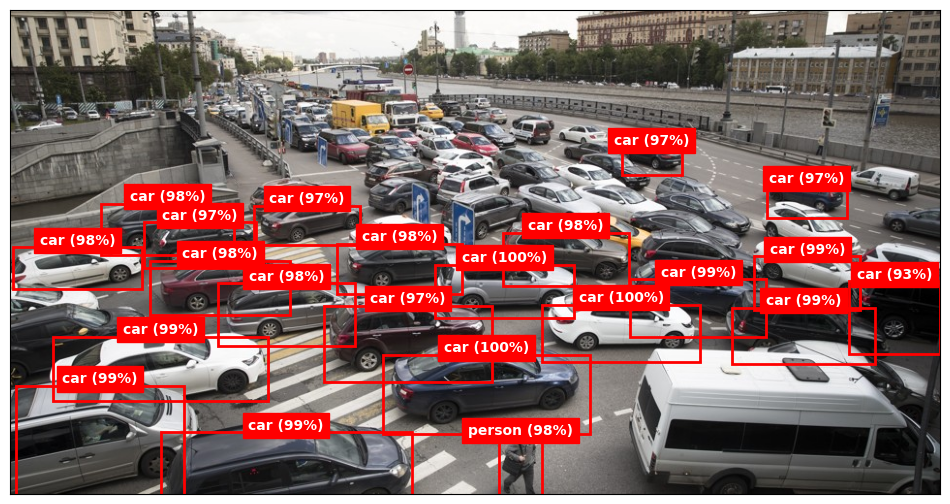

In [ ]:
draw_boxes('/content/facebook.jpg', boxes)

Next, we'll make changes to a predefined function in yolo3.py. Specifically, we'll adjust the draw_boxes function to iterate through each bounding box, extract its coordinates and dimensions, determine the color and line style based on class labels (if available), draw the box on the plot, add a label showing the class and confidence score, and then display the plot with the annotated bounding boxes while removing axis ticks.

In [ ]:
from yolo3_modified import *

In [ ]:
x = load_img('/content/abby-lady.jpg', target_size=(YOLO3.width, YOLO3.height))
x = img_to_array(x) / 255
x = np.expand_dims(x, axis=0)
y = model.predict(x)

1/1 [==============================] - 0s 25ms/step


# Practical Exercise #1

The code below first reads an image ('abby-lady.jpg') and obtains its dimensions. Then, it decodes predictions ('boxes') obtained from the YOLOv3 model, filtering out predictions with a minimum score of 0.55.

We want to display the bounding boxes on the image with custom colors and line styles specified by the class_colors and class_styles dictionaries.

Your tasks:
- Define Class Colors: You can define a dictionary class_colors where keys are the class labels and values are the corresponding colors you want to assign to each class. You can choose any color you prefer. For example, you might assign 'blue' to the 'person' class, 'green' to the 'sofa' class, 'orange' to the 'dog' class, and 'magenta' to the 'laptop' class.

- Define Class Styles: Similarly, you can define a dictionary class_styles where keys are the class labels and values are the line styles you want to use for each class. You can choose from the predefined line styles provided earlier in the example, such as 'dotted', 'dashdot', 'dashed', or 'solid'. You should ensure that each class label corresponds to a unique line style.

- Once you have defined class_colors and class_styles, you can use these dictionaries when calling the draw_boxes function to visualize the bounding boxes with custom colors and line styles.


(46, 27), (2763, 2707), person, 0.9308187961578369
(14, 271), (3418, 2866), sofa, 0.6722355484962463
(510, 1232), (1716, 2237), laptop, 0.9789468050003052
(1485, 975), (3804, 3185), dog, 0.5572258830070496


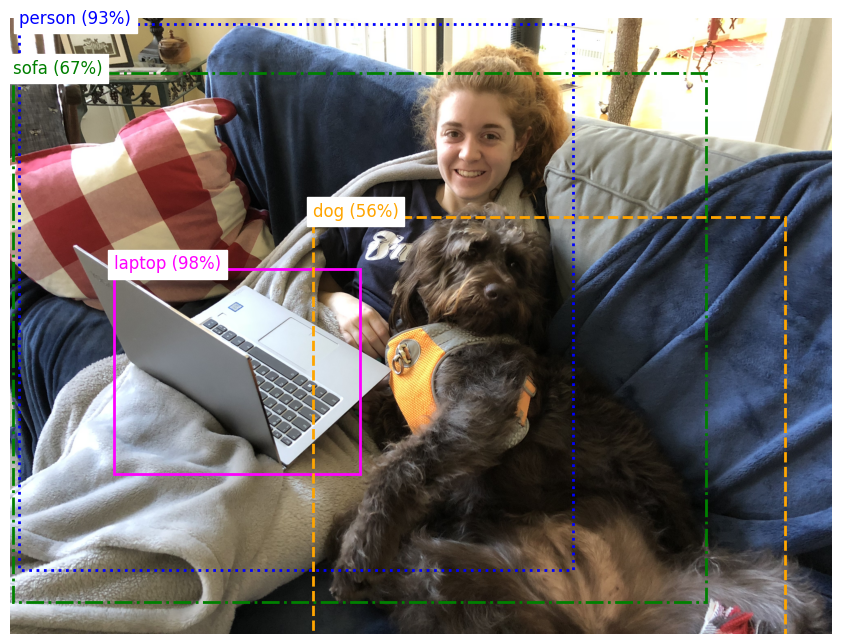

In [ ]:
image = plt.imread('/content/abby-lady.jpg')
width, height = image.shape[1], image.shape[0]

boxes = decode_predictions(y, width, height, min_score=0.55)

# Missing lines
## Begin Code (2 lines of code)
class_colors =
class_styles =
## End Code

for box in boxes:
    print(f'({box.xmin}, {box.ymin}), ({box.xmax}, {box.ymax}), {box.label}, {box.score}')

# Missing line: Draw bounding boxes with custom colors and styles (1 line of code)
## Begin Code

## End Code
plt.show()

# Practical Exercise # 2

This function, visualize_class_distribution, takes a list of bounding boxes (boxes) and a minimum score (min_score) as inputs. It calculates the count of each class label present in the provided bounding boxes, considering only those with a score greater than or equal to the specified minimum score. Then, it creates a bar plot showing the distribution of object classes based on their counts. The plot includes labels for the object classes on the x-axis, the corresponding counts on the y-axis, and a title indicating the minimum score threshold used for filtering. Additionally, it applies formatting to improve readability, such as rotating the x-axis labels and adding gridlines. Finally, it displays the plot using Matplotlib.

Your tasks:
- Loop through Bounding Boxes: Use a for loop to iterate over each bounding box in the boxes list. Within the loop, access each bounding box and its associated class label.

- Increment Class Counts: Inside the loop, update the class_counts dictionary by incrementing the count for each class label encountered. You can access the class label of each bounding box using box.label.

- Extract Class Labels and Counts: After the loop, extract the class labels and counts from the class_counts dictionary. You can use the keys() and values() methods to obtain the class labels and their corresponding counts.

In [ ]:
def visualize_class_distribution(boxes,min_score):
    class_counts = {label: 0 for label in YOLO3.labels}

    # Begin Code

    # Loop through Bounding Boxes (1 line of code)
        # Increment Class Counts (1 line of code)

    # Extract Class Labels and Counts (2 lines of code)
    classes =
    counts =

    # End Code

    plt.figure(figsize=(12, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Object Class')
    plt.ylabel('Count')
    plt.title(f'Object Class Distribution (Confidence min score threshold: {min_score})')
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

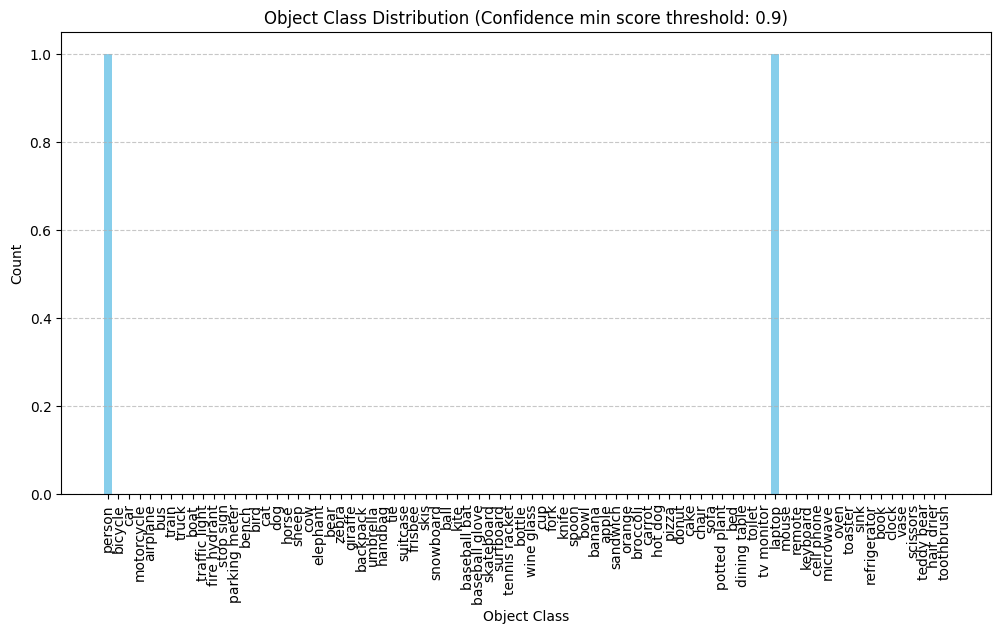

In [ ]:
boxes = decode_predictions(y, width, height, min_score=0.9)

# Visualize class distribution
visualize_class_distribution(boxes, min_score=0.9)

The confidence threshold determines the minimum confidence score required for a detected object to be considered valid. It filters out detections with confidence scores below this threshold, effectively controlling the number of detected objects.

Notice that lowering the confidence threshold to 0.55 enabled the model to detect not only the dog but also the sofa. Trained on the COCO dataset, the model possesses the ability to recognize a wide array of objects, such as traffic lights, stop signs, diverse types of food and animals, as well as bottles and wine glasses. Please download the COCO classes text file from [COCO classes file](https://github.com/matlab-deep-learning/Object-Detection-Using-Pretrained-YOLO-v2/blob/main/+helper/coco-classes.txt)


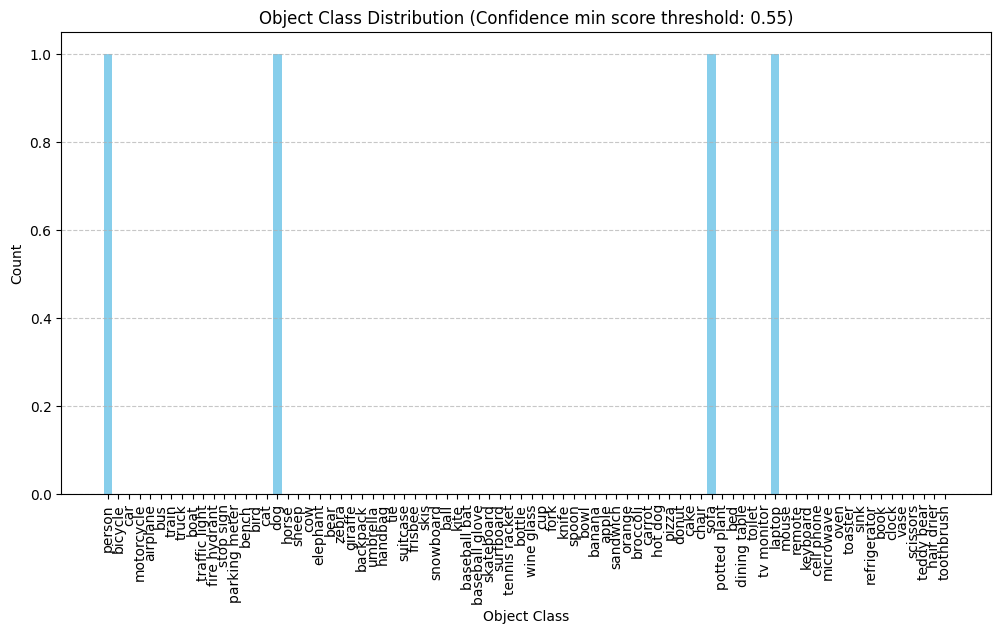

In [ ]:
boxes = decode_predictions(y, width, height, min_score=0.55)

# Visualize class distribution
visualize_class_distribution(boxes, min_score=0.55)

What would be the minimum confidence threshold to detect all the objects found in the image? The find_optimal_confidence_threshold function aims to find the optimal confidence threshold for detecting specific target classes in YOLO object detection. It iterates over different confidence thresholds, starting from the maximum confidence and decrementing by the specified step size until it reaches the minimum confidence. For each threshold, it decodes the predictions and checks if only the target classes are detected. If so, it returns the confidence threshold rounded to two decimal places. If no suitable threshold is found, it returns the minimum confidence threshold rounded to two decimal places. This function helps determine the confidence threshold required to detect the desired target classes effectively.

In [ ]:
def find_optimal_confidence_threshold(predictions, image_width, image_height, target_classes, min_confidence=0.5, max_confidence=0.9, step=0.05):
    def are_only_target_classes_detected(boxes, target_classes):
        detected_classes = set(box.label for box in boxes)
        return detected_classes == set(target_classes)

    confidence_threshold = max_confidence
    while confidence_threshold >= min_confidence:
        boxes = decode_predictions(predictions, image_width, image_height, min_score=confidence_threshold)
        if are_only_target_classes_detected(boxes, target_classes):
            return round(confidence_threshold, 2)
        else:
            confidence_threshold -= step
    return round(min_confidence, 2)  # If no threshold satisfies the condition, return the minimum threshold

This code first defines a list of target classes (e.g., 'dog', 'person', 'sofa', 'laptop'). Then, it calls the find_optimal_confidence_threshold function with the predictions (y), image width, height, and target classes. Finally, it prints the optimal confidence threshold determined by the function for detecting the specified classes.

In [ ]:
# Example usage:
classes = ['dog','person', 'sofa', 'laptop'] # Example classes
confidence_threshold = find_optimal_confidence_threshold(y, width, height, classes)
print(f"Optimal confidence threshold for detecting specified classes: {confidence_threshold}")

Optimal confidence threshold for detecting specified classes: 0.55


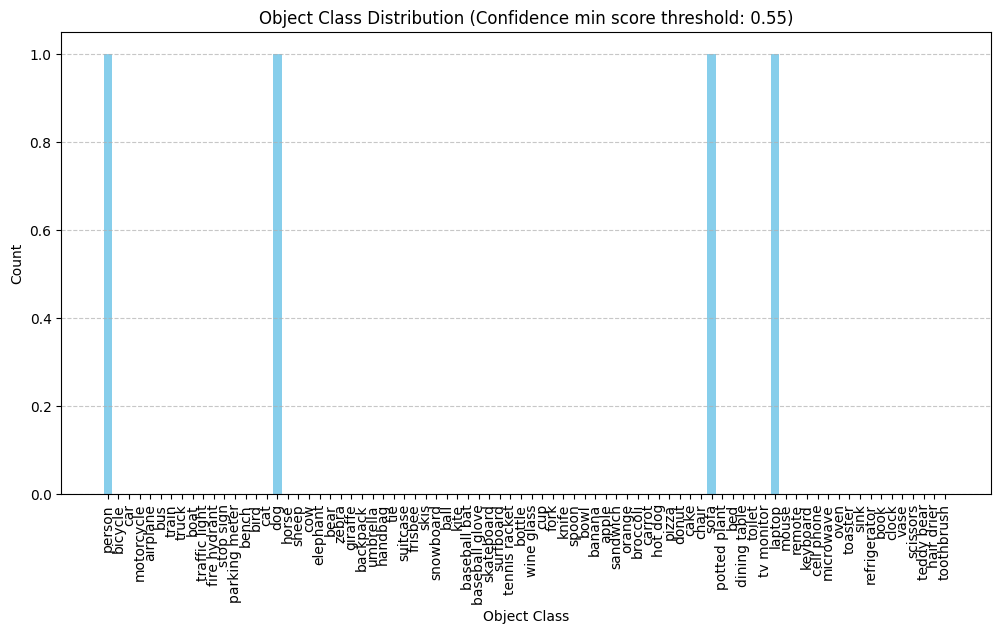

In [ ]:
# Visualize class distribution
visualize_class_distribution(boxes, min_score=confidence_threshold)

Here, I generated an AI image using [this online tool](https://gencraft.com/generate) and I specified in the text prompt the following: generate an image with one or more of the following objects: person, bicycle, car, motorbike, bus, traffic light. These objects are in the coco_classes.txt file.

1/1 [==============================] - 0s 45ms/step
Optimal confidence threshold for detecting specified classes: 0.5


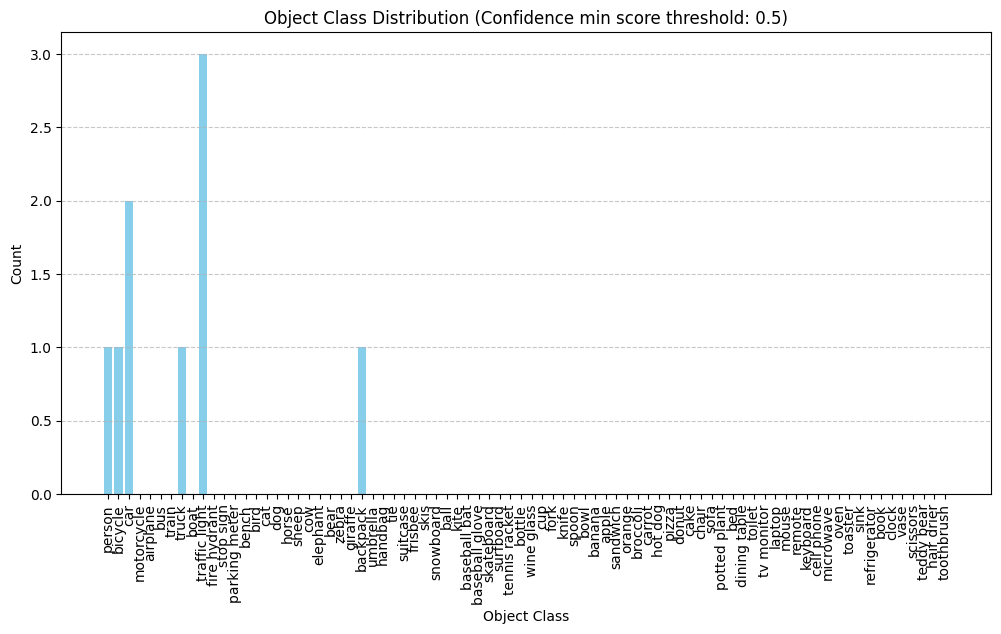

In [ ]:
x = load_img('/content/ai_image.jpg', target_size=(YOLO3.width, YOLO3.height))
x = img_to_array(x) / 255
x = np.expand_dims(x, axis=0)
y = model.predict(x)

image = plt.imread('/content/ai_image.jpg')
width, height = image.shape[1], image.shape[0]

classes = ['person', 'bicycle', 'car', 'bus', 'traffic light'] # Example classes
confidence_threshold = find_optimal_confidence_threshold(y, width, height, classes)
print(f"Optimal confidence threshold for detecting specified classes: {confidence_threshold}")

# Visualize class distribution
boxes = decode_predictions(y, width, height, min_score=confidence_threshold)
visualize_class_distribution(boxes, min_score=confidence_threshold)

This code dynamically generates class colors and styles based on the predicted classes obtained from the bounding boxes. It first extracts the predicted classes from the boxes and then creates dictionaries to map each class to a unique color and line style. The color palette and line styles are predefined and cyclically assigned to the classes.

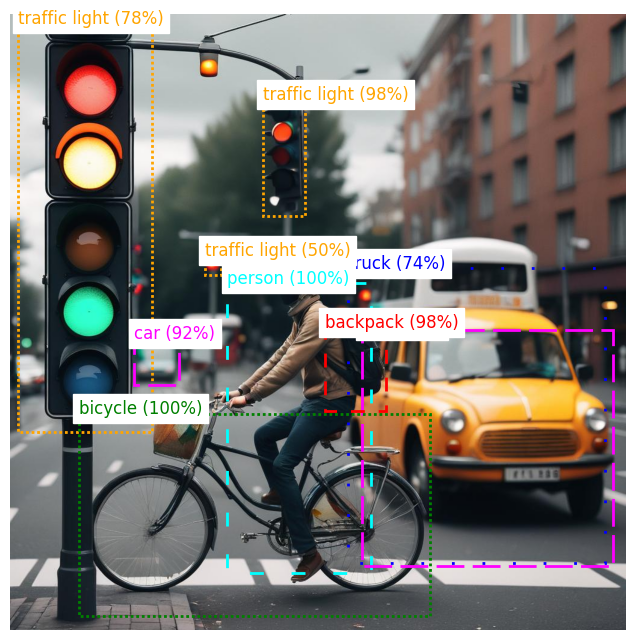

In [ ]:
# Assuming classes are obtained dynamically from the predictions
predicted_classes = list(set(box.label for box in boxes))

# Define line styles
linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

# Define a list of colors
colors = ['blue', 'green', 'orange', 'magenta', 'cyan','red', 'purple', 'lime', 'skyblue', 'pink', 'brown','yellow']

# Generate class_colors and class_styles dictionaries dynamically based on the predicted classes
class_colors = {cls: colors[i % len(colors)] for i, cls in enumerate(predicted_classes)}
class_styles = {cls: linestyle_tuple[i % len(linestyle_tuple)][1] for i, cls in enumerate(predicted_classes)}

# Draw bounding boxes with custom colors and styles
image_path = "/content/ai_image.jpg"
draw_boxes(image_path, boxes, class_colors=class_colors, class_styles=class_styles)
plt.show()

# Practical Exercise # 3

Now, it is your turn! Generate an AI image containing three or more of the object classes in coco_classes.txt file. You can use any online AI tool.

- Perform predictions
- Obtain the minimum confidence threshold to detect all the objects in the image
- Visualize class distributions
- Draw bounding boxes with custom colors and styles
